<a href="https://colab.research.google.com/github/Javiour2003/Compute_Tasks/blob/main/JatinJadhav_Linear_Regression_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Implementing Linear Regression for predicting profit of a food truck given the population and profits of different cities


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [ ]:
#in dataset both the column has values in multiple of 10k

### Reading the dataset

In [2]:
#load dataset
df=pd.read_csv("/content/Data1.txt",names=['Population_in_10k','Profit_in_10k'])
df

,Population_in_10k,Profit_in_10k
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [3]:
#describe the dataframe
df.describe()

,Population_in_10k,Profit_in_10k
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Scatter plot of Population vs Profit

In [26]:
#plot

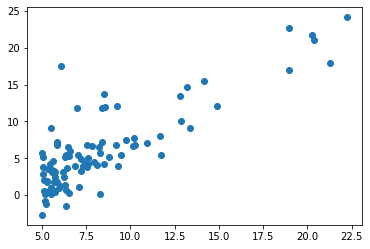

In [4]:
plt.scatter(df['Population_in_10k'],df['Profit_in_10k'])
plt.xlabel='Population_in_10k'
plt.ylabel='Profit_in_10k'
plt.legend
plt.show()

### Function to compute the cost function 

In [ ]:
### Function to compute the cost function 

In [5]:
def computeCost(X, y, theta):
    inner_product = np.power(((X * theta.T) - y) , 2)
    return np.sum(inner_product) / (2 * len(X))

### Appending 1s to the front of the dataset

In [6]:
#insert column with 1s
l=np.ones(len(df))
df.insert(0,'Ones',l)
df

,Ones,Population_in_10k,Profit_in_10k
0,1.0,6.1101,17.59200
1,1.0,5.5277,9.13020
2,1.0,8.5186,13.66200
3,1.0,7.0032,11.85400
4,1.0,5.8598,6.82330
...,...,...,...
92,1.0,5.8707,7.20290
93,1.0,5.3054,1.98690
94,1.0,8.2934,0.14454
95,1.0,13.3940,9.05510


### Set training data (X) and target variable (y)

In [7]:
cols = df.shape[1]
x = df.iloc[:,0:cols-1]
y = df.iloc[: , cols-1:cols]


### Converting dataframe to numpy matrices and creating a parameter (theta) matrix

In [8]:
#converting X,y into numpy matrix
x_mat = np.matrix(x)
y_mat = np.matrix(y)
x_mat

matrix([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7

In [9]:
#converting theta into numpy matrix
# take initial values as [0,0] for theta
theta = np.matrix(np.array([0,0]))

print(theta)


[[0 0]]


In [10]:
print(computeCost(x_mat,y_mat,theta))


32.072733877455676


### Function to perform gradient descent on parameters theta by repeatedly updating the parameters

In [11]:
def gradientDescent(x, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    # With each iteration, we are calculating the changes to be made to the
    # parameter (theta) value to reduce the error (cost)
    for i in range(iters):
        
        error = (x *theta.T)-y
        # number of parameters to be calculated,here we have 2 parameters theta [0,0] and theta [0,1]
        for j in range (parameters):
        
        
            term = np.multiply(error , x[: , j])
            temp[0,j] = theta[0,j] - ((alpha /len(x)) *np.sum(term))
        
        theta = temp
        cost[i] = computeCost(x,y,theta)
        
        
    return theta, cost

### Set values for learning rate and number of iterations
- alpha here denotes the learning rate that helps to determine how quickly the algorithm
    will converge to the optimal solution
- iters denotes the number of iterations

In [12]:
# take alpha 0.01 
# iters=1000
alpha = 0.01
iters = 1000


theta, cost = gradientDescent(x_mat,y_mat,theta,alpha,iters)

In [16]:
print(theta)
#print(cost)

[[-3.24140214  1.1272942 ]]


In [23]:
cost.shape

(1000,)




### Using Matplotlib library to visualize our solution using scatter plot

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

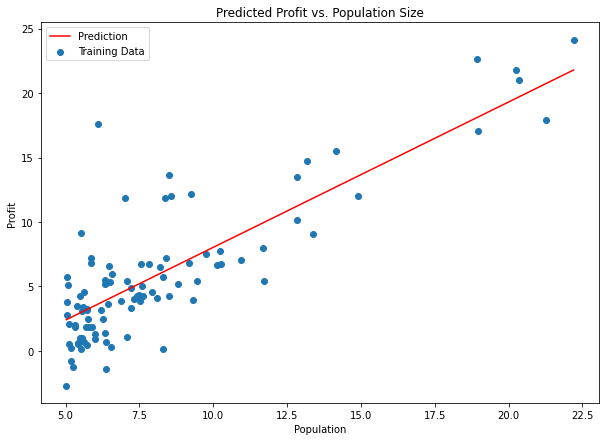

In [19]:
# linspace function will create an evenly-spaced series of points within the range of our data
x = np.linspace(df.Population_in_10k.min(), df.Population_in_10k.max(), 100)  
f = theta[0, 0] + (theta[0, 1] * x)

fig, ax = plt.subplots(figsize=(10, 7))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(df.Population_in_10k, df.Profit_in_10k, label='Training Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')


Text(0.5, 1.0, 'Error vs Training epoch')

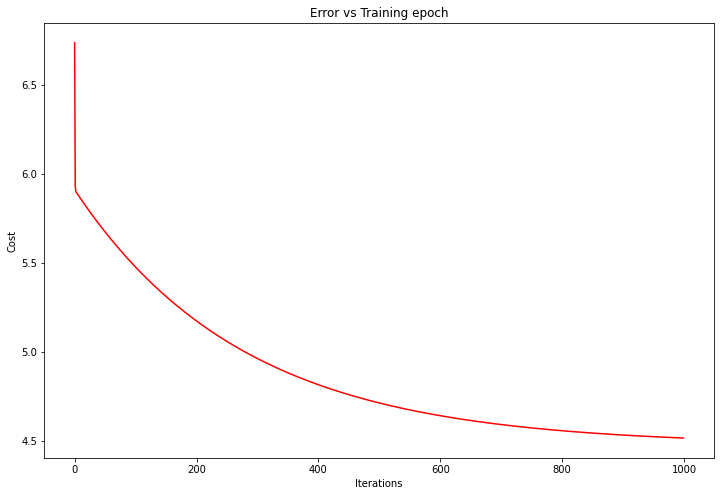

In [17]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training epoch')

SCIKIT LEARN IMPLEMENTATION

-Implement various type of errors,
 eg.Mean squared error,R_squared_score
choose best for the evaluting model,
and justify why it is best


In [18]:
X=df.iloc[:,1]    #defining X and y
y=df.iloc[:,2]

In [43]:
y

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: Profit_in_10k, Length: 97, dtype: float64

In [37]:
x=np.array(X).reshape(-1,1)
x

array([[ 6.1101],
       [ 5.5277],
       [ 8.5186],
       [ 7.0032],
       [ 5.8598],
       [ 8.3829],
       [ 7.4764],
       [ 8.5781],
       [ 6.4862],
       [ 5.0546],
       [ 5.7107],
       [14.164 ],
       [ 5.734 ],
       [ 8.4084],
       [ 5.6407],
       [ 5.3794],
       [ 6.3654],
       [ 5.1301],
       [ 6.4296],
       [ 7.0708],
       [ 6.1891],
       [20.27  ],
       [ 5.4901],
       [ 6.3261],
       [ 5.5649],
       [18.945 ],
       [12.828 ],
       [10.957 ],
       [13.176 ],
       [22.203 ],
       [ 5.2524],
       [ 6.5894],
       [ 9.2482],
       [ 5.8918],
       [ 8.2111],
       [ 7.9334],
       [ 8.0959],
       [ 5.6063],
       [12.836 ],
       [ 6.3534],
       [ 5.4069],
       [ 6.8825],
       [11.708 ],
       [ 5.7737],
       [ 7.8247],
       [ 7.0931],
       [ 5.0702],
       [ 5.8014],
       [11.7   ],
       [ 5.5416],
       [ 7.5402],
       [ 5.3077],
       [ 7.4239],
       [ 7.6031],
       [ 6.3328],
       [ 6

In [40]:
#fit the model
lr=LinearRegression()
lr.fit(x,y)


LinearRegression()

In [42]:
#predict the target values
y_pred=lr.predict(x)
y_pred

array([ 3.39377399,  2.6989512 ,  6.26719552,  4.45927234,  3.09515767,
        6.10530086,  5.02381586,  6.33818102,  3.84247394,  2.13452698,
        2.91727635, 13.00234766,  2.94507404,  6.13572322,  2.833764  ,
        2.52202431,  3.69835548,  2.22460102,  3.77494824,  4.53992141,
        3.48802365, 20.28701109,  2.65409313,  3.65146926,  2.74333205,
       18.70624151, 11.40845471,  9.17628876, 11.82363042, 22.59314512,
        2.37050903,  3.96559502,  7.13763287,  3.13333475,  5.90033768,
        5.56903223,  5.7629002 ,  2.79272364, 11.41799898,  3.68403908,
        2.55483273,  4.31527318, 10.07225703,  2.99243747,  5.43934948,
        4.56652606,  2.1531383 ,  3.02548451, 10.06271276,  2.71553436,
        5.09993141,  2.43648379,  4.96118159,  5.17497322,  3.65946258,
        3.69060076,  3.58955081,  2.83257096,  7.21160096,  7.38268198,
        6.63321825,  2.28329828, 21.49078204, 13.88996469, 18.72294398,
        4.71577457,  6.0005525 ,  8.3161115 ,  2.66518834, 20.37

In [44]:
#evalute the model
r2_score(y,y_pred)

0.7020315537841397

In [45]:
mean_squared_error(y,y_pred)

8.953942751950358